In [1]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:


def rho_green_light(nx, rho_light):
    rho = numpy.arange(nx)*2./nx*rho_light  # Before stoplight
    rho[int((nx-1)/2):] = 0
    
    return rho



In [4]:
nx = 81
nt = 30
dx = 4.0/(nx-1)


x = numpy.linspace(0,4,nx)

rho_max = 10.
u_max = 1.
rho_light = 10.

rho = rho_green_light(nx, rho_light)


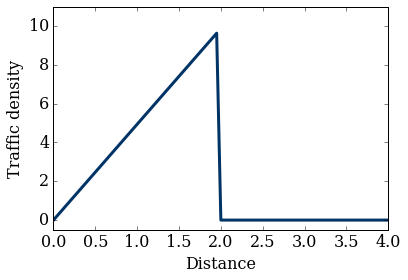

In [5]:

pyplot.plot(x, rho, color='#003366', ls='-', lw=3)
pyplot.ylabel('Traffic density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5,11.);



In [6]:
def computeF(u_max, rho_max, rho):
     return u_max*rho*(1-rho/rho_max)

При помощи функции enumerate возращаем набор кортежей из типа(i,Uw)i является индексом эллемента массива скоростей таким образом можно определить в какой ячейке скорость стала отрицательной и следовательно надо менять схему (как избавиться от цикла не очень понятно.Как вариант останавливать цикл как только появилось первое отрицательное значение а потом считать все по правому уголку)

In [7]:
U_w = u_max*(1-2*rho/rho_max )
print(rho)
print(U_w)

[ 0.          0.24691358  0.49382716  0.74074074  0.98765432  1.2345679
  1.48148148  1.72839506  1.97530864  2.22222222  2.4691358   2.71604938
  2.96296296  3.20987654  3.45679012  3.7037037   3.95061728  4.19753086
  4.44444444  4.69135802  4.9382716   5.18518519  5.43209877  5.67901235
  5.92592593  6.17283951  6.41975309  6.66666667  6.91358025  7.16049383
  7.40740741  7.65432099  7.90123457  8.14814815  8.39506173  8.64197531
  8.88888889  9.13580247  9.38271605  9.62962963  0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
[ 1.          0.95061728  0.90123457  0.85185185  0.80246914  0

In [8]:
def ftbs(rho, nt, dt, dx, rho_max, u_max):
    """ Computes the solution with forward in time, backward in space
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    
    #initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho)))      
    #copy the initial u array into each row of our new array
    rho_n[0,:] = rho.copy()
    
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        U_w = u_max*(1-2*rho/rho_max )
        
        for i, Uw in enumerate(U_w):#фильтр 
            if Uw >= 0:                       
                rho_n[t,i] = rho[i] - dt/dx*(F[i]-F[i-1])
            else:
                rho_n[t,i] = rho[i] - dt/dx*(F[i+1]-F[i])
        rho_n[t,0] = rho[0]
        rho = rho_n[t].copy()

    return rho_n

In [9]:
sigma = 1.
dt = sigma*dx

rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)

In [10]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

ImportError: No module named 'JSAnimation'

NameError: name 'display_animation' is not defined

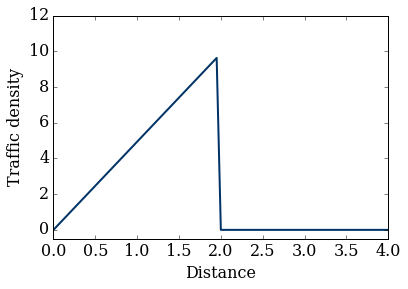

In [13]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-.5,12),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')

In [ ]:
ef ftbs(rho, nt, dt, dx, rho_max, u_max):
    """ Computes the solution with forward in time, backward in space
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    
    #initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho)))      
    #copy the initial u array into each row of our new array
    rho_n[0,:] = rho.copy()
    
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        U_w = u_max*(1-2*rho/rho_max )
        
        for i, Uw in enumerate(U_w):#фильтр 
            if Uw >= 0:                       
                rho_n[t,i] = rho[i] - dt/dx*(F[i]-F[i-1])
            else:
                rho_nb=rho[t,i:]
                break
        rho_nb[t,1:] = rho[1:] - dt/dx*(F[2:]-F[1:])
        rho_n[t,0] = rho[0]
        rho = rho_n[t].copy()

    return rho_n
